In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import os

exec(open("../header.py").read())

Header initialized


In [2]:
threshold = 40

In [3]:
raw_train_data = pd.read_csv(processed_root("03-bag-of-words/threshold-"+str(threshold)+"/bow_train_data.csv"))
raw_val_data = pd.read_csv(processed_root("03-bag-of-words/threshold-"+str(threshold)+"/bow_val_data.csv"))
raw_test_data = pd.read_csv(processed_root("03-bag-of-words/threshold-"+str(threshold)+"/bow_test_data.csv"))

In [4]:
raw_train_data.columns

Index(['poetry_text', 'sympathi', 'meet', 'high', 'among', 'steep',
       'splendour', 'wood', 'like', 'grow',
       ...
       'crumbl', 'chiefli', 'england', 'vein', 'meek', 'ash', 'pair', 'utmost',
       'fierc', 'poetry_author'],
      dtype='object', length=1899)

### Import

In [5]:
list(set(raw_train_data['poetry_author'].values))

['Kay Ryan',
 'Emily Dickinson',
 'Walt Whitman',
 'William Wordsworth',
 'Rae Armantrout',
 'William Shakespeare',
 'Percy sshe Shelley',
 'William Butler Yeats',
 'Yusef Komunyakaa',
 'John Ashbery',
 'John Donne',
 'Alfred, Lord Tennyson']

In [6]:
X_train = raw_train_data\
    .drop(['poetry_text', 'poetry_author'], axis = 1)
X_val = raw_val_data\
    .drop(['poetry_text', 'poetry_author'], axis = 1)
y_train = raw_train_data['poetry_author']
y_val = raw_val_data['poetry_author']

### Model

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [11]:
nb = MultinomialNB(fit_prior = False)

### Train

In [13]:
y_pred = nb.fit(X_train, y_train)

### Evaluate

In [14]:
# Training
y_pred_train = nb.predict(X_train)
train_accuracy = np.mean(y_pred_train == y_train) * 100
print("Training Accuracy: %.2f%%"%(train_accuracy))

# Validation
y_pred_val = nb.predict(X_val)
val_accuracy = np.mean(y_pred_val == y_val) * 100
print("Validation Accuracy: %.2f%%"%(val_accuracy))

Training Accuracy: 86.20%
Validation Accuracy: 30.28%


## Tuning process

In [8]:
def tuning_loop(alpha_choices):
    
    train_accuracies = []
    val_accuracies = []

    for alpha in alpha_choices:
        nb = MultinomialNB(alpha = alpha, fit_prior = False)
        nb.fit(X_train, y_train)
        # Training
        y_pred_train = nb.predict(X_train)
        train_accuracy = np.mean(y_pred_train == y_train) * 100
        train_accuracies.append(train_accuracy)

        # Validation
        y_pred_val = nb.predict(X_val)
        val_accuracy = np.mean(y_pred_val == y_val) * 100
        val_accuracies.append(val_accuracy)
        
    return train_accuracies, val_accuracies

In [40]:
def plot_results(tune_var, train, val):
    fig, ax = plt.subplots()
    ax.plot(tune_var, train, label = "Train")
    ax.plot(tune_var, val, label = "Validation")
    ax.set_title("Random Forest Accuracy versus Max Depth")
    ax.set_xlabel("Max Depth")
    ax.set_ylabel("Accuracy (%)")
    ax.legend()
    
    print("Maximum validation accuracy, %.2f%% found at alpha of %.2f."\
      %(max(val), tune_var[np.argmax(val)]))

## Tune 1

In [41]:
alpha_choices1 = [1,10,100]
t1, v1 = tuning_loop(alpha_choices1)

Maximum validation accuracy, 56.69% found at alpha of 1.00.


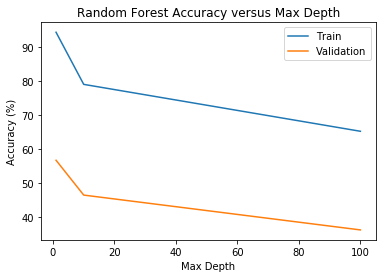

In [42]:
plot_results(alpha_choices1, t1, v1)

## Tune 2

In [43]:
alpha_choices2 = [0.01, 0.1, 1, 5, 10]
t2, v2 = tuning_loop(alpha_choices2)

Maximum validation accuracy, 57.48% found at alpha of 0.10.


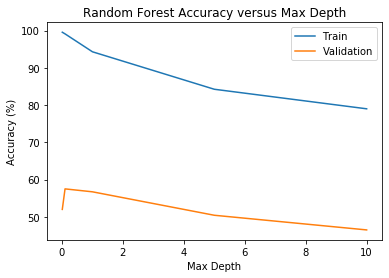

In [44]:
plot_results(alpha_choices2, t2, v2)

## Tune 3

In [45]:
alpha_choices3 = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
t3, v3 = tuning_loop(alpha_choices3)

Maximum validation accuracy, 58.27% found at alpha of 0.40.


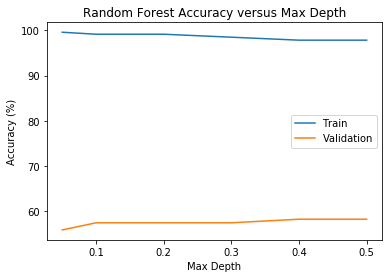

In [46]:
plot_results(alpha_choices3, t3, v3)